Principal component Analysis



1) Import all the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


2) Load the Dataset


In [14]:
df = pd.read_csv('/content/cars-used.csv')

In [15]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [16]:
print(df.shape)

(10668, 9)


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


3) Plotting continues numerical features


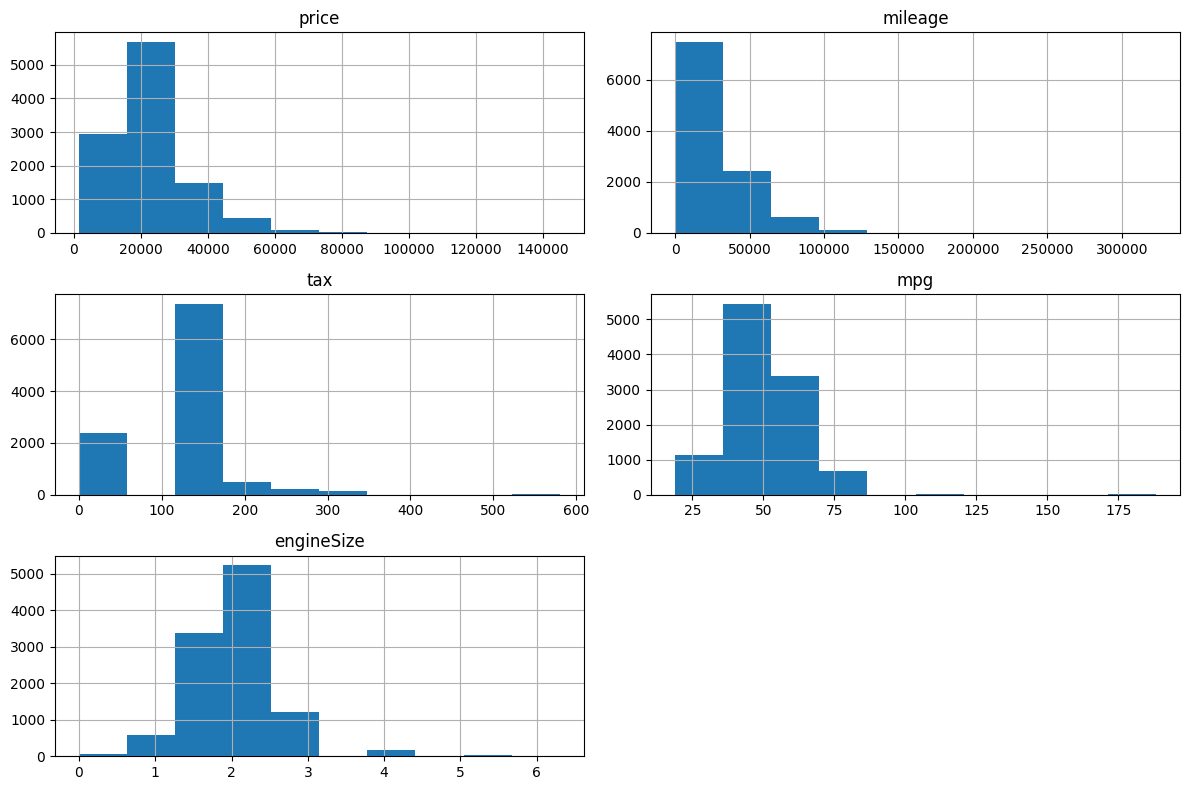

In [25]:
df[['price', 'mileage', 'tax', 'mpg', 'engineSize']].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['price', 'mileage', 'tax', 'mpg', 'engineSize']])

4) Principal Component Analysis (PCA) object


In [46]:
pca = PCA()

In [47]:
X_pca = pca.fit_transform(X_scaled)

5) Principal Component Analysis (PCA) from scratch


In [48]:
def pca_hardcode(X, n_components):
  # standardise
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    # getting covariance
    cov_matrix = np.cov(X_std, rowvar=False)
    # finding eigenvector from eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    # sort
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    # gettting principal components
    principal_components = sorted_eigenvectors[:, :n_components]
    # pca matrix
    X_pca_matrix = np.dot(X_std, principal_components)
    return X_pca_matrix



In [49]:
pca_hardcode(X_scaled, 5)

array([[ 0.71902917,  0.59998816,  0.90659111,  0.48718876,  0.17682601],
       [ 1.63152568, -0.17158082, -1.13448962, -0.1917157 ,  0.31182769],
       [ 1.76435473,  0.55524926, -0.14173725, -0.67307348,  0.36106893],
       ...,
       [ 0.32771384,  1.54807128,  1.11606792,  0.24857562, -0.07419197],
       [ 0.00502203,  0.93027148,  0.79130369,  0.13296914,  0.01637301],
       [ 0.20632161,  0.79116099,  0.94691528,  0.09887612,  0.16690309]])

In [50]:
X_pca

array([[-0.71902917, -0.59998816, -0.90659111,  0.48718876, -0.17682601],
       [-1.63152568,  0.17158082,  1.13448962, -0.1917157 , -0.31182769],
       [-1.76435473, -0.55524926,  0.14173725, -0.67307348, -0.36106893],
       ...,
       [-0.32771384, -1.54807128, -1.11606792,  0.24857562,  0.07419197],
       [-0.00502203, -0.93027148, -0.79130369,  0.13296914, -0.01637301],
       [-0.20632161, -0.79116099, -0.94691528,  0.09887612, -0.16690309]])

6) Plotting explained variance ratio


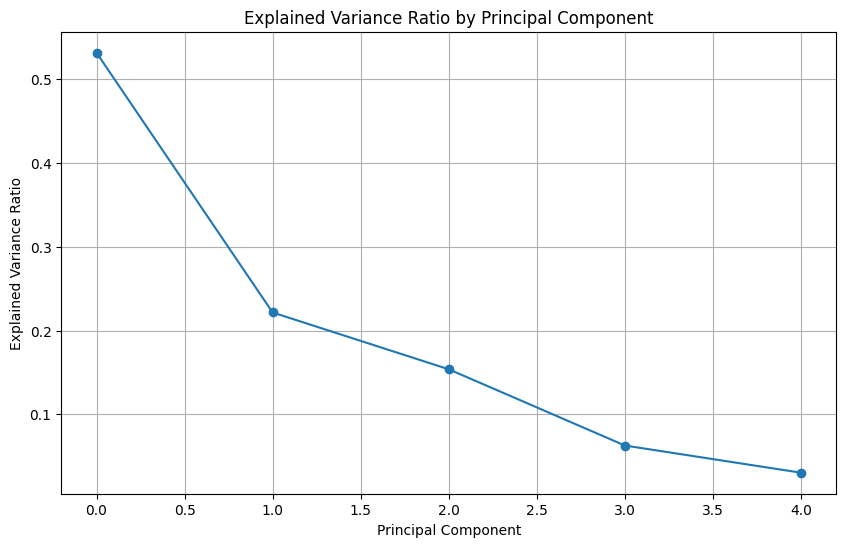

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)
plt.show()

7) Plotting explained variance


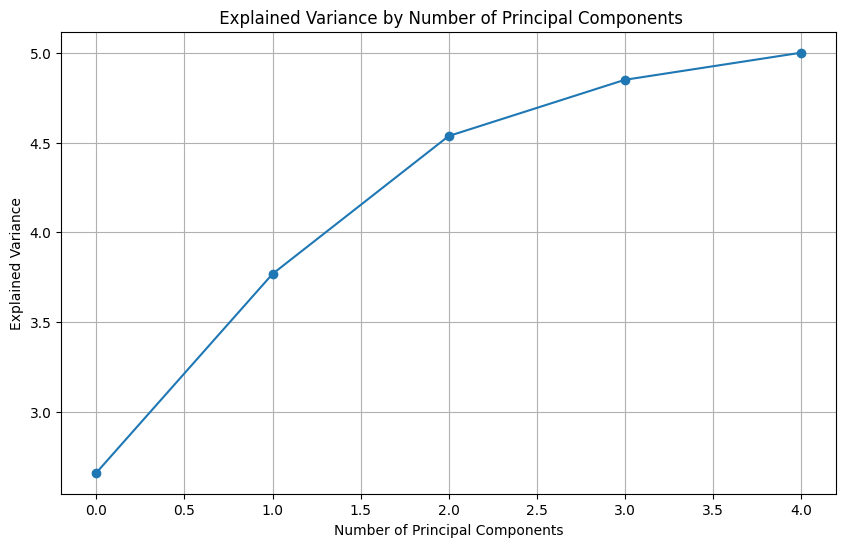

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title(' Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

8) Plotting Cumulative explained variance


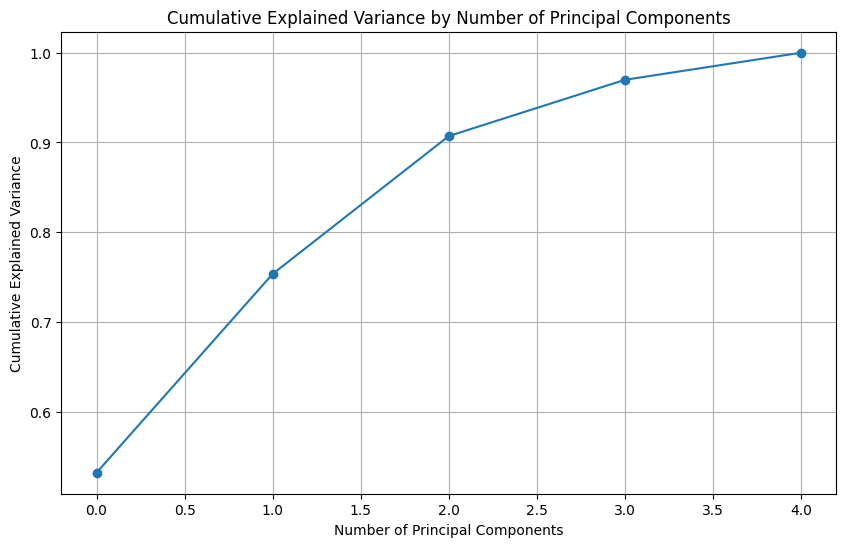

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


9) Covariance matrix of Principal components

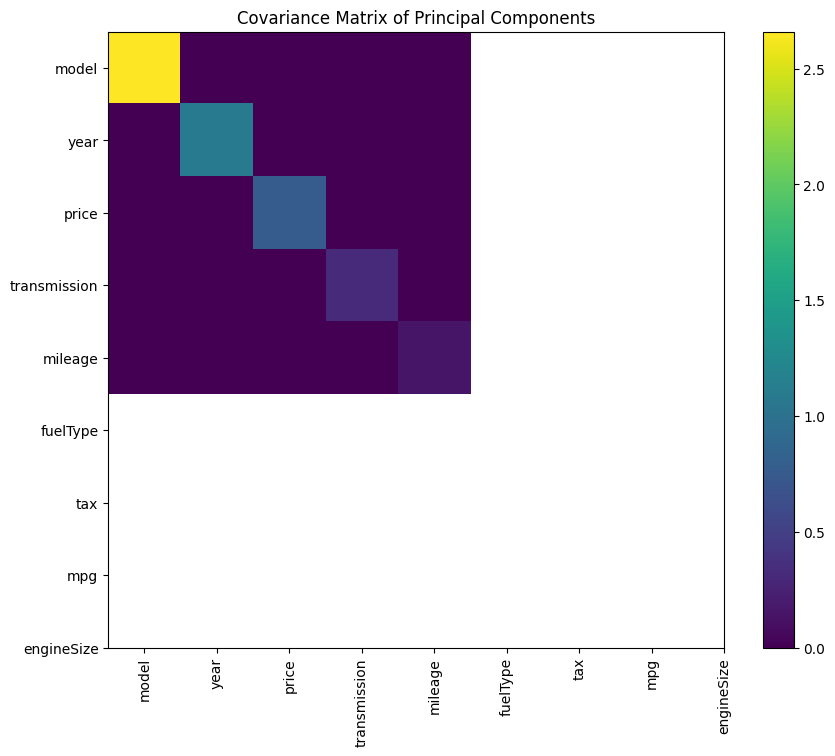

In [31]:
cov_matrix = np.cov(X_pca.T)
plt.figure(figsize=(10, 8))
plt.imshow(cov_matrix, interpolation='nearest')
plt.title('Covariance Matrix of Principal Components')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()